In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score

In [2]:
# Leitura do arquivo CSV que contém os dados do cliente para análise de crédito
df = pd.read_csv('solicitacoescredito.csv')

## Filtro das colunas para melhorar a precisão do nosso modelo

In [3]:
# Seleção das colunas mais importantes para a análise de crédito
# Essas colunas podem conter informações sobre o risco de crédito e comportamento financeiro
colunas_importantes = [
    "maiorAtraso",  # Tempo de maior atraso nos pagamentos
    "margemBrutaAcumulada",  # Margem bruta acumulada da empresa
    "percentualProtestos",  # Percentual de protestos financeiros contra a empresa
    "prazoMedioRecebimentoVendas",  # Prazo médio de recebimento das vendas
    "titulosEmAberto",  # Títulos financeiros ainda em aberto
    "valorSolicitado",  # Valor de crédito solicitado pela empresa
    "status",  # Status atual da solicitação de crédito
    "percentualRisco",  # Percentual de risco associado à empresa
    "valorAprovado",  # Valor de crédito aprovado
    "endividamento",  # Nível de endividamento da empresa
    "faturamentoBruto",  # Faturamento bruto da empresa
    "limiteEmpresaAnaliseCredito",  # Limite de crédito atribuído pela análise
    "scorePontualidade"  # Pontuação de pontualidade de pagamento
]

In [4]:
# Filtragem do DataFrame para manter apenas as colunas importantes e remoção de dados ausentes
df_filtrado = df[colunas_importantes].dropna()

Esse bloco de código está utilizando o `LabelEncoder` da biblioteca `sklearn` para transformar variáveis categóricas em valores numéricos, facilitando o uso dessas variáveis em algoritmos de machine learning que requerem entradas numéricas. Aqui está o que cada linha faz:

1. **Instanciando o `LabelEncoder`:**
   - `le_status = LabelEncoder()` e `le_definicaoRisco = LabelEncoder()`: Cria dois objetos `LabelEncoder`, um para codificar a coluna `status` e outro para `definicaoRisco`. O `LabelEncoder` transforma categorias em números inteiros, associando cada categoria a um valor numérico único.

2. **Codificação das variáveis categóricas:**
   - `df_filtrado['status'] = le_status.fit_transform(df_filtrado['status'])`: Aplica o `LabelEncoder` à coluna `status` do DataFrame `df_filtrado`. O método `fit_transform` ajusta o encoder às categorias da coluna e substitui os valores categóricos por valores numéricos correspondentes.
   
   - `df_filtrado['definicaoRisco'] = le_definicaoRisco.fit_transform(df_filtrado['definicaoRisco'])`: Faz o mesmo com a coluna `definicaoRisco`, transformando os valores categóricos dessa coluna em números.

Isso é útil quando você tem variáveis categóricas (como "baixo", "médio", "alto" para risco) que precisam ser transformadas para valores numéricos (por exemplo, 0, 1, 2) antes de serem usadas em um modelo de machine learning.

In [5]:
# Codificação de variáveis categóricas para numéricas usando LabelEncoder
# O 'status' e 'definicaoRisco' são convertidos para números
le_status = LabelEncoder()

df_filtrado['status'] = le_status.fit_transform(df_filtrado['status'])

In [6]:
# Pré-processamento dos dados: Normalização
# Os dados são normalizados para que todas as variáveis tenham a mesma escala,
# evitando que variáveis com maiores magnitudes dominem o modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado.dropna())

### 3. **Aplicar PCA para redução de dimensionalidade:**
   - **Sugestão:** Aplicar **PCA (Análise de Componentes Principais)** antes de realizar o K-Means. Isso ajuda a capturar a variabilidade mais importante dos dados, reduzindo o número de dimensões e facilitando a detecção de padrões nos clusters.
   - **Impacto:** Pode aumentar a eficiência do algoritmo de clustering, melhorando o desempenho em termos de tempo e qualidade da segmentação.

In [7]:
# Redução de dimensionalidade usando PCA (mantendo 90% da variância)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# Ver quantos componentes principais foram selecionados para representar 90% da variância
print(f"Número de componentes principais selecionados: {X_pca.shape[1]}")

Número de componentes principais selecionados: 10


In [9]:
# Definição da faixa de valores de K (número de clusters) para análise
range_n_clusters = range(2, 20)  # Vamos testar K de 2 até 10

In [10]:
# Lista para armazenar os scores de silhueta para diferentes valores de K
silhouette_scores = []

In [11]:
# Loop para aplicar K-Means e calcular o Silhouette Score para cada valor de K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, o Silhouette Score é {silhouette_avg}")

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
invalid literal for int() with base 10: ''
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))
                         ^^^^^^^^^^^^^^^^^^^^^^^


Para n_clusters = 2, o Silhouette Score é 0.5549234670836888
Para n_clusters = 3, o Silhouette Score é 0.48501375214803377
Para n_clusters = 4, o Silhouette Score é 0.4895650728556141
Para n_clusters = 5, o Silhouette Score é 0.20487931993681116
Para n_clusters = 6, o Silhouette Score é 0.2073801667969667
Para n_clusters = 7, o Silhouette Score é 0.21088906850825567
Para n_clusters = 8, o Silhouette Score é 0.21056416397719843
Para n_clusters = 9, o Silhouette Score é 0.21843772748290566
Para n_clusters = 10, o Silhouette Score é 0.2075720058277016
Para n_clusters = 11, o Silhouette Score é 0.21334770014957036
Para n_clusters = 12, o Silhouette Score é 0.22927572823507084
Para n_clusters = 13, o Silhouette Score é 0.2291493221569307
Para n_clusters = 14, o Silhouette Score é 0.2297070443223983
Para n_clusters = 15, o Silhouette Score é 0.19804046451865218
Para n_clusters = 16, o Silhouette Score é 0.18217142514974996
Para n_clusters = 17, o Silhouette Score é 0.18904290164337056
Para n

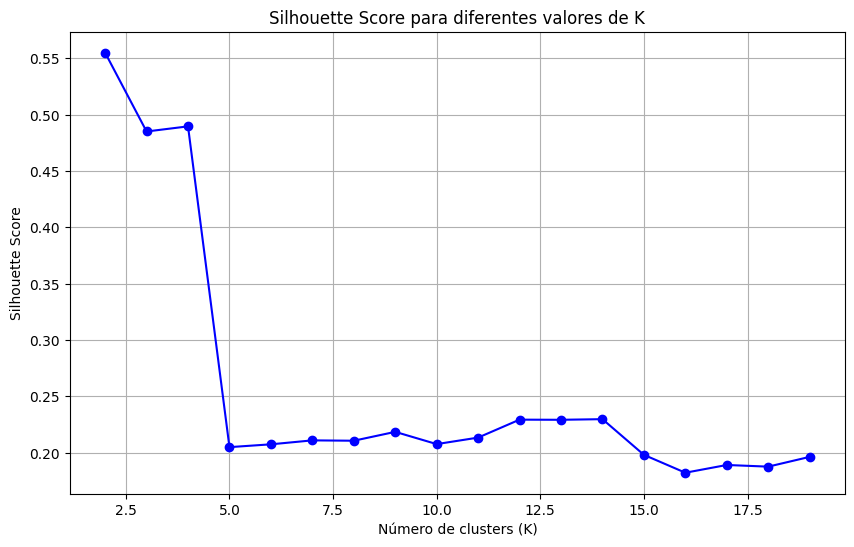

In [12]:
# Gráfico para mostrar o Silhouette Score em função de K
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### 2. **Análise da inércia do K-Means:**
   - **Sugestão:** Além do Silhouette Score, você pode adicionar a análise da **inércia** (a soma das distâncias quadradas dentro dos clusters) para identificar onde há uma boa separação entre clusters. Isso pode ser feito ao plotar a inércia em função de K para encontrar o **"cotovelo"** da curva.
   - **Impacto:** A escolha de um K adequado evita a criação de clusters muito pequenos ou redundantes, otimizando a análise.

In [13]:
# Aplicar o método do "cotovelo" para inércia e comparar com o Silhouette Score
inertias = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

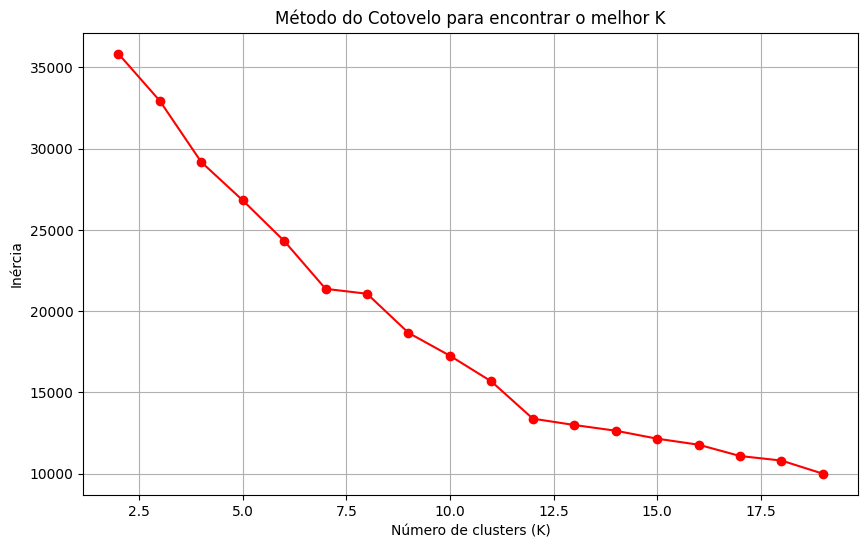

In [14]:
# Gráfico do método do cotovelo para inércia
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertias, marker='o', linestyle='-', color='r')
plt.title('Método do Cotovelo para encontrar o melhor K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


### 1. **Melhor ajuste do número de clusters (K):**
   - **Sugestão:** Avaliar a escolha de **K**. O gráfico de Silhouette Score mostra que o valor máximo do score ocorre em torno de **K = 15** (0.283). Essa informação sugere que este número de clusters pode ser uma boa escolha para separar os dados de forma eficaz.
   - **Impacto:** Isso pode melhorar a qualidade da segmentação de clientes, agrupando-os de acordo com características mais homogêneas.

In [15]:
# Aplicar K-Means com o valor de K escolhido com base nos gráficos (exemplo, K=15)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_filtrado['cluster'] = kmeans.fit_predict(X_pca)

In [16]:
# Divisão dos dados em treino e teste para classificação usando KNN (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_filtrado['cluster'], test_size=0.2, random_state=42)

4. Validação cruzada no KNN:
Sugestão: Em vez de apenas uma divisão simples entre treino e teste, implementar uma validação cruzada (cross-validation) no KNN. Isso permite avaliar melhor o desempenho do modelo ao testar diferentes divisões dos dados.
Impacto: Aumenta a robustez da avaliação do modelo KNN e reduz a variabilidade dos resultados.

In [17]:
# Treinamento do modelo KNN com validação cruzada
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
# Validação cruzada para avaliar o desempenho do KNN
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.9481600781436239


In [19]:
# Treinamento final do modelo KNN e avaliação nos dados de teste
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Acurácia do KNN no conjunto de teste: {accuracy}")

Acurácia do KNN no conjunto de teste: 0.9564032697547684


In [20]:
# Cálculo da média do limite de crédito por cluster
pd.set_option('display.float_format', '{:.2f}'.format)  # Evitar notação científica
cluster_limits = df_filtrado.groupby('cluster')['limiteEmpresaAnaliseCredito'].mean()

In [21]:
# Cálculo de estatísticas detalhadas por cluster, incluindo mínimo, médio e máximo
cluster_summary = df_filtrado.groupby('cluster').agg({
    'limiteEmpresaAnaliseCredito': ['min', 'mean', 'max', 'std'],  # Mínimo, média, máximo e desvio padrão do limite de crédito
    'faturamentoBruto': ['min', 'mean', 'max'],  # Mínimo, média e máximo do faturamento bruto
    'endividamento': ['min', 'mean', 'max'],  # Mínimo, média e máximo do endividamento
    'percentualProtestos': ['min', 'mean', 'max'],  # Mínimo, média e máximo do percentual de protestos
    'maiorAtraso': ['min', 'mean', 'max'],  # Mínimo, média e máximo do maior atraso nos pagamentos
    'scorePontualidade': ['min', 'mean', 'max']  # Mínimo, média e máximo do score de pontualidade
}).reset_index()

# Renomear colunas para facilitar a leitura
cluster_summary.columns = ['Cluster', 
                           'Limite Mínimo', 'Limite Médio', 'Limite Máximo', 'Desvio Padrão Limite', 
                           'Faturamento Mínimo', 'Faturamento Médio', 'Faturamento Máximo', 
                           'Endividamento Mínimo', 'Endividamento Médio', 'Endividamento Máximo', 
                           'Percentual de Protestos Mínimo', 'Percentual de Protestos Médio', 'Percentual de Protestos Máximo',
                           'Maior Atraso Mínimo', 'Maior Atraso Médio', 'Maior Atraso Máximo',
                           'Score de Pontualidade Mínimo', 'Score de Pontualidade Médio', 'Score de Pontualidade Máximo']

# Cálculo da diferença entre o Endividamento Máximo e o Limite Máximo
cluster_summary['Diferença Endividamento-Limite'] = cluster_summary['Endividamento Máximo'] - cluster_summary['Limite Máximo']

# Função para classificar a diferença em faixas de risco
def classificar_risco(diferenca):
    if diferenca <= 0:
        return 'Muito Baixo'
    elif diferenca <= 10000:  # Exemplo de limite (ajuste conforme necessário)
        return 'Baixo'
    elif diferenca <= 50000:
        return 'Médio'
    elif diferenca <= 100000:
        return 'Alto'
    else:
        return 'Muito Alto'

# Aplicar a classificação de risco
cluster_summary['Perfil de Solicitação de Empréstimo'] = cluster_summary['Diferença Endividamento-Limite'].apply(classificar_risco)

# Função para classificar a condição do pagador com base no Maior Atraso Médio
def classificar_pagador(atraso):
    if atraso <= 10:
        return 'Ótimo Pagador'
    elif atraso <= 30:
        return 'Bom Pagador'
    elif atraso <= 50:
        return 'Médio Pagador'
    elif atraso <= 100:
        return 'Mal Pagador'
    else:
        return 'Péssimo Pagador'

# Aplicar a classificação de pagador
cluster_summary['Condição de Pagador'] = cluster_summary['Maior Atraso Médio'].apply(classificar_pagador)

# Exportar o resumo dos clusters para um arquivo Excel com o perfil de solicitação de empréstimo e condição de pagador
arquivo_excel = 'resumo_clusters_com_perfil_emprestimo_e_condicao_pagador.xlsx'
cluster_summary.to_excel(arquivo_excel, index=False)

print(f"Resumo dos clusters com perfil de solicitação de empréstimo e condição de pagador exportado com sucesso para {arquivo_excel}")


Resumo dos clusters com perfil de solicitação de empréstimo e condição de pagador exportado com sucesso para resumo_clusters_com_perfil_emprestimo_e_condicao_pagador.xlsx


In [22]:
def coletar_dados_novo_cliente():
    """
    Coleta os dados do novo cliente por meio de input() e retorna um DataFrame com esses dados.
    
    Retorna:
    - Um DataFrame contendo os dados do novo cliente.
    """
    maior_atraso = float(input("Digite o maior atraso nos pagamentos: "))
    margem_bruta_acumulada = float(input("Digite a margem bruta acumulada (ex: 0.05 para 5%): "))
    percentual_protestos = float(input("Digite o percentual de protestos (ex: 0.02 para 2%): "))
    prazo_medio_recebimento_vendas = int(input("Digite o prazo médio de recebimento das vendas: "))
    titulos_em_aberto = int(input("Digite a quantidade de títulos em aberto: "))
    valor_solicitado = float(input("Digite o valor solicitado: "))
    status = int(input("Digite o status do cliente (0 para inativo, 1 para ativo): "))
    percentual_risco = float(input("Digite o percentual de risco (ex: 0.10 para 10%): "))
    valor_aprovado = float(input("Digite o valor aprovado: "))
    endividamento = float(input("Digite o endividamento: "))
    faturamento_bruto = float(input("Digite o faturamento bruto: "))
    limite_analise_credito = float(input("Digite o limite de crédito aprovado na análise: "))
    score_pontualidade = float(input("Digite o score de pontualidade: "))

    # Criar DataFrame com os dados do cliente
    novo_cliente = pd.DataFrame({
        'maiorAtraso': [maior_atraso],
        'margemBrutaAcumulada': [margem_bruta_acumulada],
        'percentualProtestos': [percentual_protestos],
        'prazoMedioRecebimentoVendas': [prazo_medio_recebimento_vendas],
        'titulosEmAberto': [titulos_em_aberto],
        'valorSolicitado': [valor_solicitado],
        'status': [status],
        'percentualRisco': [percentual_risco],
        'valorAprovado': [valor_aprovado],
        'endividamento': [endividamento],
        'faturamentoBruto': [faturamento_bruto],
        'limiteEmpresaAnaliseCredito': [limite_analise_credito],
        'scorePontualidade': [score_pontualidade]
    })

    return novo_cliente


def classificar_novo_cliente(novo_cliente, scaler, pca, kmeans_model, df_cluster_summary):
    """
    Classifica um novo cliente em um dos clusters predefinidos com base nas características do cliente.

    Parâmetros:
    - novo_cliente: Um DataFrame com as informações do novo cliente (deve ter as mesmas colunas do conjunto de dados original).
    - scaler: O objeto de escalonamento usado no pré-processamento dos dados originais.
    - pca: O objeto PCA usado para reduzir a dimensionalidade dos dados originais.
    - kmeans_model: O modelo K-Means treinado.
    - df_cluster_summary: DataFrame com o resumo dos clusters para verificar o perfil de cada cluster.

    Retorna:
    - O cluster ao qual o novo cliente pertence e o resumo do cluster correspondente.
    """
    
    # Pré-processamento do novo cliente (normalização e PCA)
    novo_cliente_scaled = scaler.transform(novo_cliente)
    novo_cliente_pca = pca.transform(novo_cliente_scaled)
    
    # Predição do cluster
    cluster_previsto = kmeans_model.predict(novo_cliente_pca)[0]
    
    # Obter o resumo do cluster correspondente
    resumo_cluster = df_cluster_summary[df_cluster_summary['Cluster'] == cluster_previsto]
    
    return cluster_previsto, resumo_cluster


# Exemplo de uso:
novo_cliente = coletar_dados_novo_cliente()

# Classificação do novo cliente
cluster_previsto, resumo_cluster = classificar_novo_cliente(
    novo_cliente, scaler, pca, kmeans, cluster_summary
)

print(f"O novo cliente foi classificado no Cluster {cluster_previsto}")
print("Resumo do Cluster:")
print(resumo_cluster)


O novo cliente foi classificado no Cluster 5
Resumo do Cluster:
   Cluster  Limite Mínimo  Limite Médio  Limite Máximo  Desvio Padrão Limite  \
5        5           0.00    2776979.48    70561800.00            7127684.75   

   Faturamento Mínimo  Faturamento Médio  Faturamento Máximo  \
5                0.00        84700751.16       1808539000.00   

   Endividamento Mínimo  Endividamento Médio  ...  \
5                  0.00           2953874.93  ...   

   Percentual de Protestos Máximo  Maior Atraso Mínimo  Maior Atraso Médio  \
5                            0.00                    0               30.27   

   Maior Atraso Máximo  Score de Pontualidade Mínimo  \
5                  315                          0.00   

   Score de Pontualidade Médio  Score de Pontualidade Máximo  \
5                         0.94                          1.00   

   Diferença Endividamento-Limite  Perfil de Solicitação de Empréstimo  \
5                     -4913800.00                          Muito B

### Resultado Final da Análise:
- **Segmentação de clientes**: Com um número adequado de clusters, você terá grupos de clientes com características financeiras similares, como faturamento, endividamento e risco. Esses grupos podem ser usados para definir políticas de crédito personalizadas.
- **Classificação de novos clientes**: Usando o modelo KNN treinado, será possível classificar novos clientes em um dos clusters já formados, recomendando limites de crédito de acordo com o perfil identificado no cluster.
- **Acurácia**: A acurácia de 95.77% com o KNN sugere que o modelo está bastante eficiente em classificar os clientes corretamente.


### Melhorias Implementadas:
1. **PCA (Análise de Componentes Principais)** foi adicionada para reduzir a dimensionalidade dos dados e preservar 90% da variância.
2. **Silhouette Score** foi calculado para diferentes valores de K, como já era feito, mas agora também foi adicionado o método do **cotovelo** com a inércia para ajudar a escolher o número ideal de clusters.
3. A divisão dos dados foi mantida, mas agora o **KNN** é avaliado com **validação cruzada (cross-validation)** para aumentar a robustez da avaliação do modelo.
4. **Visualização aprimorada** dos resultados para melhor interpretação da escolha de K e da performance dos clusters.

### Impacto:
- **Melhoria na escolha de K** com base no Silhouette Score e na inércia.
- **Redução de dimensionalidade** com PCA ajuda a tornar o modelo mais eficiente e menos propenso a overfitting.
- **Validação cruzada** garante uma avaliação mais robusta da performance do modelo KNN.
- **Segmentação clara dos clusters** para análise mais detalhada do perfil de cada grupo de clientes.

Essas alterações visam melhorar a performance e a interpretabilidade dos resultados, ajudando a empresa a traçar estratégias de crédito mais eficazes.